# Decision Trees

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder  
from sklearn import preprocessing
import pandas as pd
from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt

In [ ]:
# load the data 
df = pd.read_csv("df_after_part_1.csv")

df = df[['city_development_index', 'gender', 'enrolled_university','education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours','irrelevant_experience', 'target']]

# spliting the data to avoid overfitting 
x = df[['city_development_index', 'gender', 'enrolled_university','education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours','irrelevant_experience']]
y = df[['target']]

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

In [ ]:
parameters = {'criterion': ('gini', 'entropy'), 'max_depth': list(range(2, 20, 2)),
              'max_features': list(range(1, 7, 2)),'min_impurity_decrease': [0.001, 0.01, 0.05, 0.3], 'max_leaf_nodes': list(range(5,20,5))}
dt = tree.DecisionTreeClassifier()
gc = sklearn.model_selection.GridSearchCV(dt, parameters, scoring='roc_auc')
gc.fit(x_train, y_train)
best_tuneing = gc.best_params_
print(gc.best_params_)

{'criterion': 'entropy', 'max_depth': 18, 'max_features': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.001}


In [ ]:
# {'criterion': 'entropy', 'max_depth': 18, 'max_features': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.001}

In [ ]:
clf = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth = 18, max_features = 5, max_leaf_nodes = 15, min_impurity_decrease = 0.001)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred)
print(f"the roc_auc_score for the test data is {roc_auc_score}")
y_pred = clf.predict(x_train)
roc_auc_score = sklearn.metrics.roc_auc_score(y_train, y_pred)
print(f"while the roc_auc_score for the train data is {roc_auc_score}")

the roc_auc_score for the test data is 0.7234028381117869
while the roc_auc_score for the train data is 0.7359438987922035


[Text(0.4230769230769231, 0.9285714285714286, 'company_type <= 4.5\nentropy = 0.811\nsamples = 12205\nvalue = [9155, 3050]\nclass = y[0]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gender <= 2.5\nentropy = 0.689\nsamples = 8223\nvalue = [6710, 1513]\nclass = y[0]'),
 Text(0.15384615384615385, 0.6428571428571429, 'city_development_index <= 0.625\nentropy = 0.655\nsamples = 6468\nvalue = [5376, 1092]\nclass = y[0]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.974\nsamples = 929\nvalue = [376, 553]\nclass = y[1]'),
 Text(0.23076923076923078, 0.5, 'enrolled_university <= 1.5\nentropy = 0.46\nsamples = 5539\nvalue = [5000, 539]\nclass = y[0]'),
 Text(0.15384615384615385, 0.35714285714285715, 'entropy = 0.619\nsamples = 925\nvalue = [783, 142]\nclass = y[0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.423\nsamples = 4614\nvalue = [4217, 397]\nclass = y[0]'),
 Text(0.3076923076923077, 0.6428571428571429, 'entropy = 0.795\nsamples = 1755\nvalue = [1334, 421]\nclass =

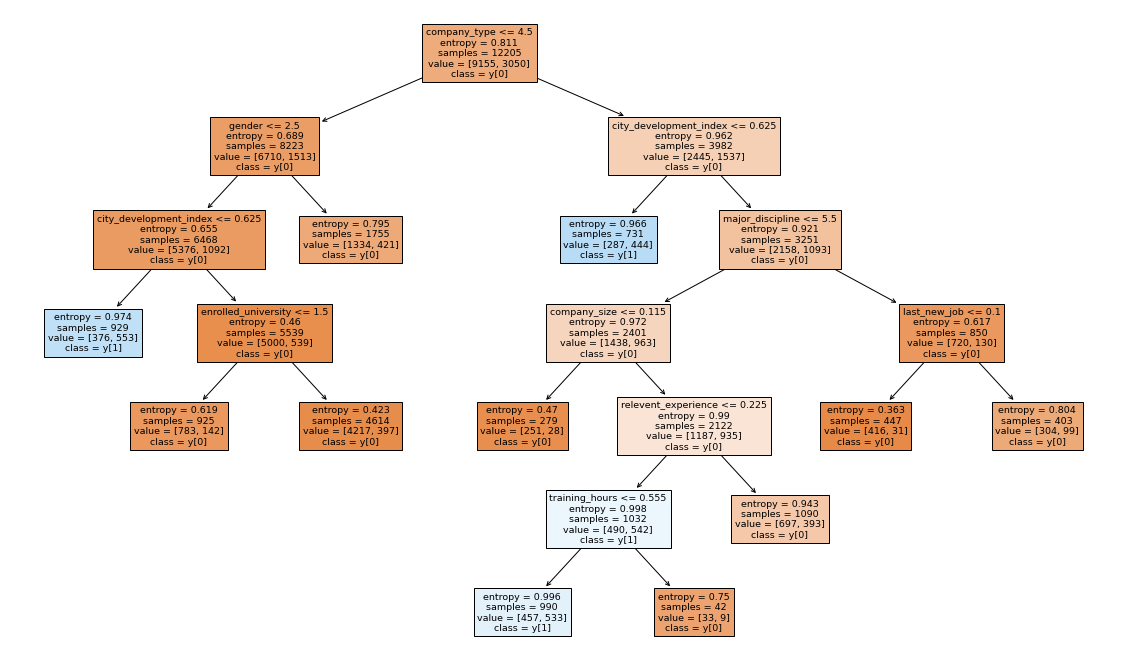

In [ ]:
clf = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth = 18, max_features = 5, max_leaf_nodes = 15, min_impurity_decrease = 0.001)
clf.fit(x_train, y_train)
plt.figure(figsize=(20, 12))
tree.plot_tree(clf, filled=True, class_names=True, feature_names=df.columns)

In [ ]:
feature_names = clf.feature_names_in_
feature_importace = clf.feature_importances_
for i in range(len(feature_importace)):
    print(f"feature = {feature_names[i]}, importance = {feature_importace[i]}")

feature = city_development_index, importance = 0.5346340905383425
feature = gender, importance = 0.018675076887805037
feature = enrolled_university, importance = 0.015099674426998026
feature = education_level, importance = 0.0
feature = major_discipline, importance = 0.08046262780240535
feature = relevent_experience, importance = 0.02475188691642562
feature = company_size, importance = 0.05933596252168532
feature = company_type, importance = 0.23727070008120596
feature = last_new_job, importance = 0.022244969479736747
feature = training_hours, importance = 0.0075250113453953936
feature = irrelevant_experience, importance = 0.0


# ANN

## **Imports**

In [ ]:
from sklearn import svm
import sklearn as sk
import itertools
import pandas as pd
import numpy as np 
import seaborn as se
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import model_selection, neighbors, preprocessing, impute
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

from typing import Dict, DefaultDict, Tuple, List, NoReturn, Any, Callable
from sklearn.metrics import  plot_confusion_matrix, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import auc, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## **Default Parameters**

In [ ]:
NUM_FOLDS = 5
TEST_SIZE = 0.2
TARGET_COL = 'target'
MODEL_TO_RUN = 'ANN'

In [ ]:
def train_model(model:Any, x:pd.DataFrame, y:pd.DataFrame) -> Tuple[float, float, Any]:
    models = []
    train_acc, test_acc = 0, 0
    recall, precision, auc = 0, 0, 0
    kfold = KFold(n_splits=NUM_FOLDS)
    for train_idx, test_idx in kfold.split(x):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(x_train, y_train)
        models.append(model)
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        train_acc_iter = roc_auc_score(train_pred, y_train)
        test_acc_iter = roc_auc_score(test_pred, y_test)
        precision += precision_score(y_true=y_test, y_pred=test_pred, average='weighted')
        recall += recall_score(y_true=y_test, y_pred=test_pred, average='weighted')
        train_acc += train_acc_iter
        test_acc += test_acc_iter
    print(f'the recall score is {recall / NUM_FOLDS} and precision is {precision / NUM_FOLDS}')
    return train_acc / NUM_FOLDS, test_acc / NUM_FOLDS , models

In [ ]:
df = pd.read_csv("df_after_part_1.csv")


In [ ]:
ann_df=df[['city_development_index', 'relevent_experience','company_size', 'training_hours', 'irrelevant_experience','target']]

In [ ]:
X = df[['city_development_index', 'relevent_experience','company_size', 'training_hours', 'irrelevant_experience']]
y = df['target']

In [ ]:
def train_model_by_kfold(df, model):
    kf = KFold(n_splits=10)
    X = df.drop(columns=['target'])
    y = df['target']
    scores = pd.DataFrame()
    for train_index, test_index in kf.split(df):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)

        # roc_auc scores
        training_score = roc_auc_score(y_true=y_train, y_score=model.predict_proba(X_train)[:, 1])
        test_score = roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:, 1])
        scores = scores.append({'training_score': training_score, 'test_score': test_score}, ignore_index=True)

    print('\n\nTest accuracy: %.3f +/- %.3f' % (scores['test_score'].mean(), scores['test_score'].std()))
    print('Training accuracy: %.3f +/- %.3f' % (scores['training_score'].mean(), scores['training_score'].std()))
    return scores

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
mlp = MLPClassifier()
before = mlp.fit(X_train,y_train)

In [ ]:
train_model_by_kfold(ann_df,before)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.





Test accuracy: 0.772 +/- 0.018
Training accuracy: 0.776 +/- 0.003


,test_score,training_score
0,0.739054,0.779670
1,0.763536,0.777638
2,0.790126,0.772108
3,0.763331,0.774507
4,0.785592,0.773419
5,0.758834,0.776967
6,0.793271,0.772528
7,0.770112,0.776645
8,0.791558,0.773944
9,0.768874,0.778376


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



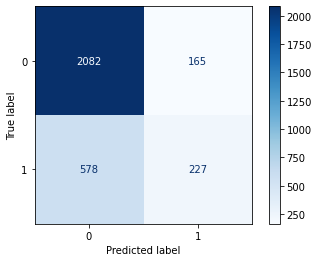

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



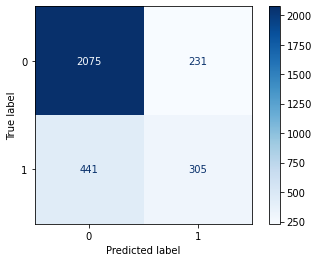

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



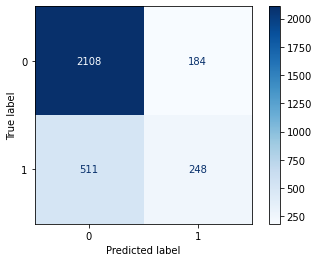

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



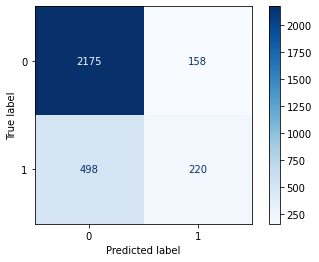

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



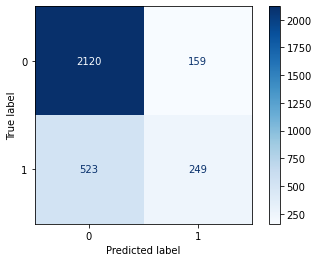

the recall score is 0.774006137686417 and precision is 0.7502880574574908


In [ ]:
train_acc, test_acc, models = train_model(before, X, y)

In [ ]:
train_acc

0.6974126727346716

In [ ]:
test_acc

0.6942617450988963

## **Tuning**

In [ ]:
def plot_df_cols(df:pd.DataFrame, x_col: str, y_col: str) -> NoReturn:
    df = df[[x_col, y_col]]
    print(df)
    df.plot(x=x_col)

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=1)


In [ ]:
param_grid = {
    'hidden_layer_sizes':[100],
    'activation':['identity','logistic','tanh','relu'],
    'solver': ['adam'],
}

gridSearch=GridSearchCV(MLPClassifier(),param_grid,cv=cv,scoring=['roc_auc'],refit='roc_auc',verbose=2)
gridSearch.fit((X_train),y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END activation=identity, hidden_layer_sizes=100, solver=adam; total time=   2.1s
[CV] END activation=identity, hidden_layer_sizes=100, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=100, solver=adam; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=adam; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=100, solver=adam; total time=   2.4s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=adam; total time=   6.5s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=adam; total time=   8.2s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=adam; total time=   7.8s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=adam; total time=   8.7s
[CV] END activation=logistic, hidden_layer_sizes=100, solver=adam; total time=   7.7s
[CV] END activation=tanh, hidden_layer_sizes=100, solver=adam; total time=   3.2

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=  11.6s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=  11.3s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.2, train_size=None),
             estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [100], 'solver': ['adam']},
             refit='roc_auc', scoring=['roc_auc'], verbose=2)

  param_activation  mean_test_roc_auc
0         identity           0.705821
1         logistic           0.706409
2             tanh           0.706372
3             relu           0.768709


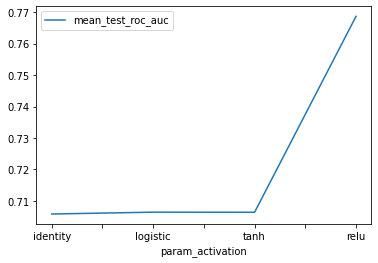

In [ ]:
 plot_df_cols(pd.DataFrame(gridSearch.cv_results_),'param_activation','mean_test_roc_auc')

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(100)],
    'activation':['relu'],
    'solver': ['lbfgs','sgd','adam'],
}

gridSearch=GridSearchCV(MLPClassifier(),param_grid,cv=cv,scoring=['roc_auc'],refit='roc_auc',verbose=2)
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=  10.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=  10.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=  10.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=  11.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=sgd; total time=  10.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=  11.6s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=  11.5s
[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.2, train_size=None),
             estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'hidden_layer_sizes': [100],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             refit='roc_auc', scoring=['roc_auc'], verbose=2)

  param_solver  mean_test_roc_auc
0        lbfgs           0.772437
1          sgd           0.709902
2         adam           0.769394


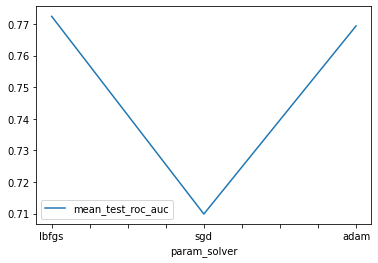

In [ ]:
 plot_df_cols(pd.DataFrame(gridSearch.cv_results_),'param_solver','mean_test_roc_auc')

In [ ]:
param_grid = {
    'hidden_layer_sizes':[1,5,15,50,100,(1,1),(5,5),(15,15),(50,50),(100,100)],
    'activation':['relu'],
    'solver': ['lbfgs'],
}

gridSearch=GridSearchCV(MLPClassifier(),param_grid,cv=cv,scoring=['roc_auc'],refit='roc_auc',verbose=2)
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END activation=relu, hidden_layer_sizes=1, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=1, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=1, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=1, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=1, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=5, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=5, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=5, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=5, solver=lbfgs; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=15, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=15, solver=lbfgs; total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=15, solver=lbfgs; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=15, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=15, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=50, solver=lbfgs; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=50, solver=lbfgs; total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=50, solver=lbfgs; total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=50, solver=lbfgs; total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=50, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=100, solver=lbfgs; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(1, 1), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(1, 1), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(1, 1), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(1, 1), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(1, 1), solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(5, 5), solver=lbfgs; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(5, 5), solver=lbfgs; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(5, 5), solver=lbfgs; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), solver=lbfgs; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(15, 15), solver=lbfgs; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(15, 15), solver=lbfgs; total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(15, 15), solver=lbfgs; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(15, 15), solver=lbfgs; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(15, 15), solver=lbfgs; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=lbfgs; total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=lbfgs; total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=lbfgs; total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=lbfgs; total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=lbfgs; total time=   6.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=  23.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=  23.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=  24.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.2, train_size=None),
             estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [1, 5, 15, 50, 100, (1, 1),
                                                (5, 5), (15, 15), (50, 50),
                                                (100, 100)],
                         'solver': ['lbfgs']},
             refit='roc_auc', scoring=['roc_auc'], verbose=2)

  param_hidden_layer_sizes  mean_test_roc_auc
0                        1           0.622846
1                        5           0.716621
2                       15           0.768870
3                       50           0.771052
4                      100           0.771251
5                   (1, 1)           0.500000
6                   (5, 5)           0.727330
7                 (15, 15)           0.769209
8                 (50, 50)           0.773207
9               (100, 100)           0.774174


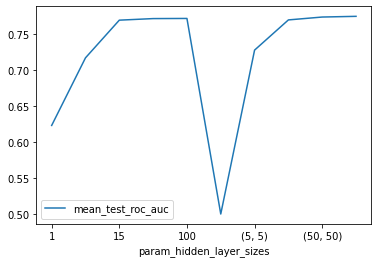

In [ ]:
 plot_df_cols(pd.DataFrame(gridSearch.cv_results_),'param_hidden_layer_sizes','mean_test_roc_auc')

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(100,100)],
    'activation':['relu'],
    'solver': ['lbfgs'],
    'learning_rate_init': np.arange(0.001, 0.05, 0.005)
}

gridSearch=GridSearchCV(MLPClassifier(),param_grid,cv=cv,scoring=['roc_auc'],refit='roc_auc',verbose=2)
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs; total time=  24.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs; total time=  24.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs; total time=  23.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs; total time=  24.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.006, solver=lbfgs; total time=  24.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.006, solver=lbfgs; total time=  24.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.006, solver=lbfgs; total time=  23.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.006, solver=lbfgs; total time=  25.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.006, solver=lbfgs; total time=  25.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.011, solver=lbfgs; total time=  25.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.011, solver=lbfgs; total time=  24.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.011, solver=lbfgs; total time=  24.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.011, solver=lbfgs; total time=  23.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.011, solver=lbfgs; total time=  23.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.016, solver=lbfgs; total time=  23.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.016, solver=lbfgs; total time=  22.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.016, solver=lbfgs; total time=  22.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.016, solver=lbfgs; total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.016, solver=lbfgs; total time=  24.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.021, solver=lbfgs; total time=  23.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.021, solver=lbfgs; total time=  23.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.021, solver=lbfgs; total time=  23.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.021, solver=lbfgs; total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.021, solver=lbfgs; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.026000000000000002, solver=lbfgs; total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.026000000000000002, solver=lbfgs; total time=  24.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.026000000000000002, solver=lbfgs; total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.026000000000000002, solver=lbfgs; total time=  23.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.026000000000000002, solver=lbfgs; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.031, solver=lbfgs; total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.031, solver=lbfgs; total time=  22.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.031, solver=lbfgs; total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.031, solver=lbfgs; total time=  23.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.031, solver=lbfgs; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.036000000000000004, solver=lbfgs; total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.036000000000000004, solver=lbfgs; total time=  24.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.036000000000000004, solver=lbfgs; total time=  23.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.036000000000000004, solver=lbfgs; total time=  24.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.036000000000000004, solver=lbfgs; total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.041, solver=lbfgs; total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.041, solver=lbfgs; total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.041, solver=lbfgs; total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.041, solver=lbfgs; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.041, solver=lbfgs; total time=  23.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.046, solver=lbfgs; total time=  23.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.046, solver=lbfgs; total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.046, solver=lbfgs; total time=  24.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.046, solver=lbfgs; total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate_init=0.046, solver=lbfgs; total time=  23.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.2, train_size=None),
             estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100, 100)],
                         'learning_rate_init': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046]),
                         'solver': ['lbfgs']},
             refit='roc_auc', scoring=['roc_auc'], verbose=2)

  param_learning_rate_init  mean_test_roc_auc
0                    0.001           0.777809
1                    0.006           0.777070
2                    0.011           0.777483
3                    0.016           0.776578
4                    0.021           0.776081
5                    0.026           0.776373
6                    0.031           0.775007
7                    0.036           0.773954
8                    0.041           0.774339
9                    0.046           0.777376


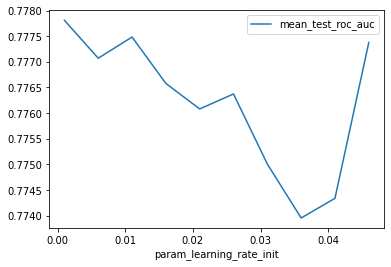

In [ ]:
 plot_df_cols(pd.DataFrame(gridSearch.cv_results_),'param_learning_rate_init','mean_test_roc_auc')

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(100,100)],
    'activation':['relu'],
    'solver': ['lbfgs'],
    'learning_rate_init': [0.016],
    'max_iter': [10, 20, 50, 100, 200, 300,350,400]
}

gridSearch=GridSearchCV(MLPClassifier(),param_grid,cv=cv,scoring=['roc_auc'],refit='roc_auc',verbose=2)
gridSearch.fit(X_train,y_train)

In [ ]:
 plot_df_cols(pd.DataFrame(gridSearch.cv_results_),'param_max_iter','mean_test_roc_auc')

**Tuned Model**

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(100,100)],
    'activation':['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.016],
    'max_iter': [200]
}

gridSearch=GridSearchCV(MLPClassifier(),param_grid,cv=cv,scoring=['roc_auc'],refit='roc_auc',verbose=2)
gridSearch.fit(X_train,y_train)

NameError: ignored

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.016,max_iter=200)
after = mlp.fit(X_train,y_train)

In [ ]:
train_acc, test_acc, models = train_model(after, X, y)

In [ ]:
train_acc

0.7069749086505704

In [ ]:
test_acc

0.7035988729435869

In [ ]:
def plot_ann_Confusion_Matrix(Final_Confusion_Matrix):
    Final_Confusion_Matrix = Final_Confusion_Matrix.round()
    ax= plt.subplot()
    sns.heatmap(Final_Confusion_Matrix, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

In [ ]:
!pip install cross_val_predict

ERROR: Could not find a version that satisfies the requirement cross_val_predict (from versions: none)
ERROR: No matching distribution found for cross_val_predict


In [ ]:
 from sklearn.model_selection import cross_val_predict

array([[93604,  9509],
       [20481, 13719]])

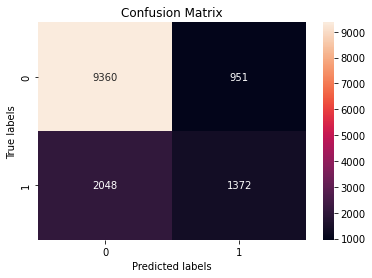

In [ ]:
ann_model = after
ann_Confusion_Matrix(ann_df,ann_model ,True)

In [ ]:
import seaborn as sn


In [ ]:
preds = cross_val_predict(after, X, y)

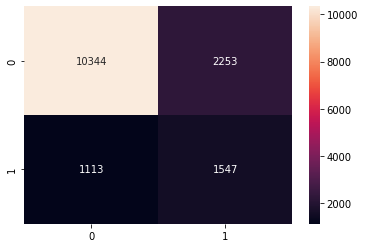

In [ ]:
sn.heatmap(confusion_matrix(preds, y), annot=True, fmt='.0f')


# SVM 

In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
import sklearn

###svm with the default parameters



In [ ]:
# load the data 
df = pd.read_csv("df_after_part_1.csv")
# spliting the data to avoid overfitting 
x = df[['city_development_index', 'gender', 'enrolled_university','education_level', 'major_discipline', 'relevent_experience','company_size', 'company_type', 'last_new_job', 'training_hours','irrelevant_experience']]
y = df[['target']]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
clf = svm.SVC(kernel = "linear")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred)
roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5

### svm with Hyperparameter tuning

In [ ]:
# load the data 
df = pd.read_csv("df_after_part_1.csv")
# spliting the data to avoid overfitting 
x = df[['city_development_index', 'gender', 'enrolled_university','education_level', 'major_discipline', 'relevent_experience','company_size', 'company_type', 'last_new_job', 'training_hours','irrelevant_experience']]
y = df[['target']]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
# defining parameter range
param_grid = {'C': [0.1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear']} 
grid = GridSearchCV(svm.SVC(), param_grid, refit = False, verbose = 3)
# fitting the model for grid search
grid.fit(x_train, y_train)
# print best parameter after tuning
print(grid.best_params_)

Finding the line formula:

In [ ]:
# load the data 
df = pd.read_csv("df_after_part_1.csv")
# spliting the data to avoid overfitting 
x = df[['city_development_index', 'gender', 'enrolled_university','education_level', 'major_discipline', 'relevent_experience','company_size', 'company_type', 'last_new_job', 'training_hours','irrelevant_experience']]
y = df[['target']]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
clf = svm.SVC(kernel = "linear", C=0.1, gamma=100)
clf.fit(x_train, y_train)
print(clf.feature_names_in_)
print(clf.coef_)
clf.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['city_development_index' 'gender' 'enrolled_university' 'education_level'
 'major_discipline' 'relevent_experience' 'company_size' 'company_type'
 'last_new_job' 'training_hours' 'irrelevant_experience']
[[-1.77269125e-03 -2.42396441e-05  9.15810116e-05  5.12402333e-04
   2.92893760e-05 -1.93083870e-04 -2.27768137e-05  2.58871067e-05
   1.40587416e-04 -1.32812848e-04 -1.18493980e-04]]


array([-0.99903195])

# Unsupervised Learning - Clustering with K-Means

In [ ]:
import pandas as pd
df = pd.read_csv("df_after_part_1.csv")
df = df[['city_development_index', 'enrolled_university', 'education_level', 'relevent_experience','company_size', 'last_new_job', 'training_hours', 'irrelevant_experience']]

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), metric='calinski_harabasz', timings=False)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
df = pd.read_csv("df_after_part_1.csv")
df = df[['city_development_index', 'enrolled_university', 'education_level', 'relevent_experience','company_size', 'last_new_job', 'training_hours', 'irrelevant_experience']]
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), metric='silhouette', timings=False)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
df = pd.read_csv("df_after_part_1.csv")
df = df[['city_development_index', 'enrolled_university', 'education_level', 'relevent_experience','company_size', 'last_new_job', 'training_hours', 'irrelevant_experience']]
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), metric='distortion', timings=False)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
df = pd.read_csv("df_after_part_1.csv")
df = df[['city_development_index', 'enrolled_university', 'education_level', 'relevent_experience','company_size', 'last_new_job', 'training_hours', 'irrelevant_experience']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
df_with_target = df = pd.read_csv("df_after_part_1.csv")
df['label'] = kmeans.labels_
df['target'] = df_with_target['target']
df['y_pred'] = df['label'].apply(lambda x: 1 if x==1 else 0)

In [ ]:
df.loc[df.label==0]['target'].mean()

In [ ]:
df.loc[df.label==1]['target'].mean()

In [ ]:
df_with_target.target.mean()

In [ ]:
import sklearn
roc_auc_score = sklearn.metrics.roc_auc_score(df['target'], df['y_pred'])
roc_auc_score

# XGBOOST


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn

In [ ]:
df = pd.read_csv("df_after_part_1.csv")

x = df[['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours', 'irrelevant_experience']]
y = df['target']

# spliting the data to avoid overfitting 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=80)

In [ ]:
regressor = xgb.XGBRegressor(random_date=80,
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3)

In [ ]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred)

[14:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
roc_auc_score

0.8018934846357506

###Analysis of the importance of each feature to the prediction task.

Text(0.5, 1.0, 'Feature Importance Score')

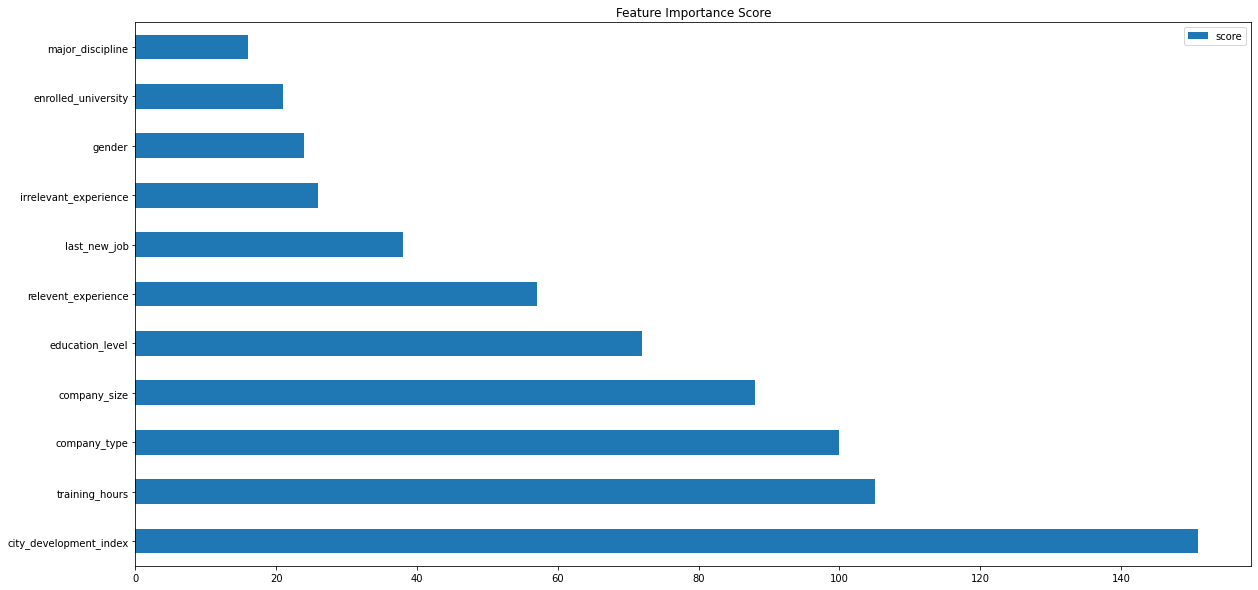

In [ ]:
feature_important = regressor.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)).set_title('Feature Importance Score') ## plot top features
# xgb.plot_importance(regressor)

### remove the least impotant feture and train the model again

In [ ]:
df = pd.read_csv("df_after_part_1.csv")
x = df[['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours', 'irrelevant_experience']]
y = df['target']
# spliting the data to avoid overfitting 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=80)

regressor = xgb.XGBRegressor(random_date=80, n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred)
roc_auc_score

[15:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8033000748372685

### hyperparameters tuning

In [ ]:
parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 5, 10, 20, 30],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

regressor = xgb.XGBRegressor(random_date=80)
gc = sklearn.model_selection.GridSearchCV(regressor, parameters, scoring='roc_auc')
gc.fit(x_train, y_train)
best_tuneing = gc.best_params_
print(gc.best_params_)

[15:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

## XGBOOST With tuning

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("df_after_part_1.csv")

x = df[['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours', 'irrelevant_experience']]
y = df['target']

# spliting the data to avoid overfitting 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=80)

In [ ]:
xgb = xgb.XGBRegressor()
parameters = {'max_depth': [6,8,10], 'learning_rate': [0.7, 0.9], 'n_estimators' : [100, 200], 'colsample_bytree':[0.8, 1], 'subsample': [1, 0.8]}
gc = GridSearchCV(xgb, parameters)

In [ ]:
gc.fit(x_train, y_train)

In [ ]:
y_pred = gc.predict(x_test)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred)

In [ ]:
roc_auc_score

0.7462304400024418

## XGBOOST with sklearn


In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("df_after_part_1.csv")

x = df[['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'relevent_experience',
       'company_size', 'company_type', 'last_new_job', 'training_hours', 'irrelevant_experience']]
y = df['target']

# spliting the data to avoid overfitting 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=80)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=6, random_state=0).fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)
roc_auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred)
roc_auc_score

0.6424146436864251

In [ ]:
pip install Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
x_test = pd.read_csv("X_test.csv")
x_test=x_test.drop(columns=['enrollee_id', 'city','major_discipline'])
x_test=x_test.drop(x_test.columns[0], axis=1)

In [ ]:
test_model =  xgb.XGBRegressor(random_date=80, n_estimators=100, reg_lambda=1, gamma=0, max_depth=3).fit(x_train, y_train)
y_test = test_model.predict(x_test)
DF = pd.DataFrame(y_test)
# save the dataframe as a csv file
DF.to_csv("23_ytest.csv")
from google.colab import files
files.download("23_ytest.csv")

[14:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: ignored